In [2]:
import pandas as pd
import psycopg2
from psycopg2 import Error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
try:
    # Connect to an existing database
    connection = psycopg2.connect(user="ycj6475",
                                  password="password!",
                                  host="pg.analytics.northwestern.edu",
                                  port="5432",
                                  database="2022-everything-team12")

    # Create a cursor to perform database operations
    cursor = connection.cursor()
    # Print PostgreSQL details
    cursor.execute("SELECT version();")
    # Fetch result
    record = cursor.fetchone()
    print("You are connected to - ", record, "\n")
except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)


You are connected to -  ('PostgreSQL 10.12 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.5 20150623 (Red Hat 4.8.5-39), 64-bit',) 



In [4]:
df_trnsact = pd.read_sql("select * from \"TRNSACT\"order by random() LIMIT 100000", connection);
df_trnsact

/opt/homebrew/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORIGPRICE,AMT,INTID,MIC,EXTRACOL
0,943969,7904,230,00700,454905781,2004-09-24,P,1,7.0,1.75,599200081,220,0
1,178750,6002,790,02400,331608327,2005-04-29,P,1,58.0,46.40,510700089,901,0
2,1797547,4707,40,03800,887108940,2005-02-24,R,1,29.0,3.62,468000270,306,0
3,236523,8309,470,01500,0,2005-02-12,P,1,16.0,4.00,52400101,519,0
4,1832285,3502,970,04300,438604076,2005-07-28,P,1,13.5,13.50,270500021,281,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,9481436,5704,290,00400,621805959,2005-07-06,P,1,18.0,18.00,971700008,090,0
99996,2181242,7904,620,07000,0,2004-10-03,P,1,29.5,3.68,365600019,205,0
99997,6720075,7707,720,03700,856806725,2005-04-17,P,1,26.0,26.00,569200002,281,0
99998,7298358,2809,100,03300,0,2005-03-12,R,1,19.0,19.00,831900146,597,0


In [5]:

if (connection):
    cursor.close()
    connection.close()
    print("PostgreSQL connection is closed") 


PostgreSQL connection is closed


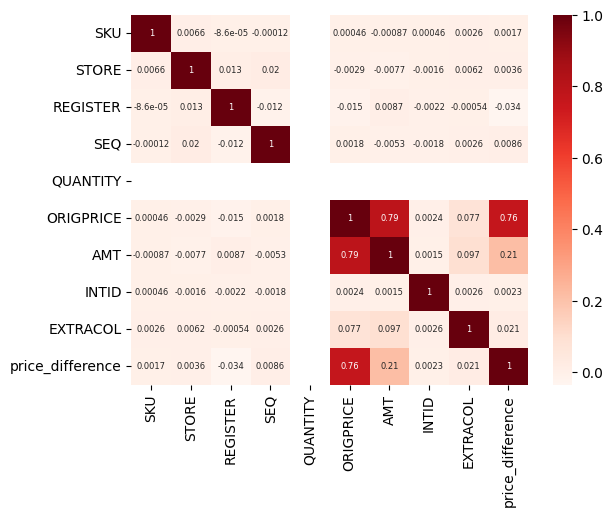

,SKU,STORE,REGISTER,SEQ,QUANTITY,ORIGPRICE,AMT,INTID,EXTRACOL,price_difference
count,1.000000e+05,100000.000000,100000.000000,1.000000e+05,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000
mean,4.960479e+06,4434.645060,400.776100,1.914038e+08,1.0,36.436093,24.427621,4.979203e+08,0.020620,12.008472
std,2.832753e+06,2844.784241,253.157025,3.013082e+08,0.0,39.136103,25.861647,2.878620e+08,0.142109,24.378165
min,3.870000e+02,102.000000,1.000000,0.000000e+00,1.0,0.000000,0.000000,8.000000e+00,0.000000,-223.120000
25%,2.619218e+06,2103.000000,190.000000,0.000000e+00,1.0,16.000000,9.990000,2.499001e+08,0.000000,0.000000
50%,4.844891e+06,4102.000000,370.000000,0.000000e+00,1.0,28.000000,18.000000,4.950000e+08,0.000000,1.000000
75%,7.366439e+06,7102.000000,580.000000,3.474054e+08,1.0,48.000000,30.500000,7.473000e+08,0.000000,17.500000
max,9.999956e+06,9909.000000,993.000000,9.999082e+08,1.0,895.000000,595.000000,9.999001e+08,1.000000,581.750000


In [6]:
df_trnsact['price_difference'] = df_trnsact['ORIGPRICE'] - df_trnsact['AMT']
sns.heatmap(df_trnsact.corr(), annot=True, cmap = 'Reds', annot_kws={"fontsize":6})
plt.show()
df_trnsact.describe()

<AxesSubplot:ylabel='Frequency'>

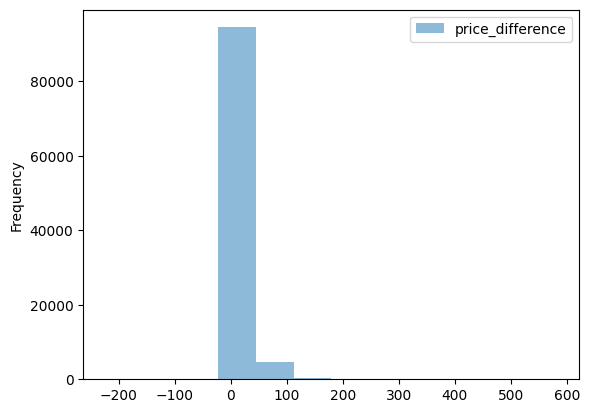

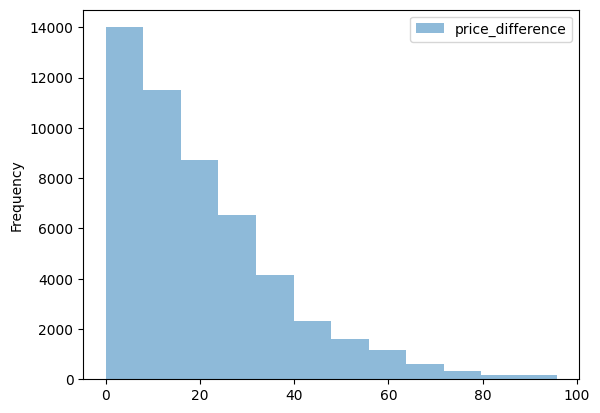

In [7]:

df_trnsact[['price_difference']].plot.hist(bins=12, alpha=0.5)
def filter_outlier(df, column):
    q_low = df[column].quantile(0.01)
    q_hi  = df[column].quantile(0.99)
    df_filtered = df[(df[column] < q_hi) & (df[column] > q_low)]
    return df_filtered
df_filtered = filter_outlier(df_trnsact, 'price_difference')
df_filtered[['price_difference']].plot.hist(bins=12, alpha=0.5)

